### **Classification Modeling in Python Using Sci-Kit Learn**
#### By Matthew Keeran 
#### 2-14-19
#### Data (Kaggle Link): [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)
#### Description: 
##### The goal of this notebook is to demonstrate basic knowledge of data manipulation, visualization & modeling in Sci-Kit Learn.<br><br>The task here is to create models which classify a person as either having or not having heart disease. 

***
## Table of Contents <a id="toc"></a>
0. <a href="#read">Read Data</a>
1. <a href="#explore">Data Exploration & Visualization</a>
2. <a href="#process">Data Preprocessing</a>
3. <a href="#train">Training Models</a>
4. <a href="#optimize">Optimizing Models</a>
5. <a href="#cluster">Clustering</a>
***

In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

***
### 0. Read Data <a id='read'></a>
##### <a href="#toc">Table of Contents</a>

In [2]:
%time data = pd.read_csv('../data/heart-disease-uci/heart.csv')
data.head()

Wall time: 8 ms


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


***

### 1. Data Exploration <a id='explore'></a>
##### <a href="#toc">Table of Contents</a>

#### For the sake of brevity (length & size of this notebook) only a sample of an exploratory data analysis (EDA) will be conducted.
#### Ordinarily a separate notebook(s) would examine every single variable and their relationships in much more detail.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


* cp - chest pain type
* trestbps - resting blood pressure
* chol - cholesterol
* fbs - fasting blood sugar
* restecg - resting ecg
* thalach - max heart rate
* exang - exercise induced angina (1 = yes, 0 = no)
* oldpeak - ST depression induced by exercise
* ca -  number of major vessels colored by flouroscopy (0-3)
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - heart disease indicator (1 = yes, 0 = no)

##### [Full variable descriptions](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names)

#### No missing values, so [imputation](https://scikit-learn.org/stable/modules/impute.html) is not necessary in this case.

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Correlation Heatmap

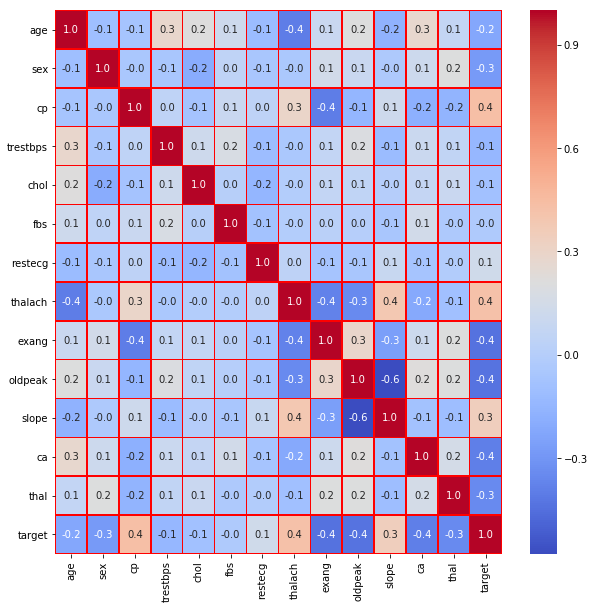

In [5]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax, cmap='coolwarm')
plt.show()

#### Heart Disease
##### 1 - Heart Disease, 0 - No Heart Disease

In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
165 / 303 * 100

54.45544554455446

#### So 54 % of people in this survey have Heart Disease, meaning the classes are fairly balanced and resampling is not necessary.

***

#### Age

In [8]:
print("Minimum Age: %d\nMaximum Age: %d" % (data['age'].min(),data['age'].max()))
print("Average Age: %.2f\nMedian Age: %.2f" % (data['age'].mean(),data['age'].median()))

Minimum Age: 29
Maximum Age: 77
Average Age: 54.37
Median Age: 55.00


#### Given the median and mean are so close, this appears to indicate that the distribution of age isn't very skewed.
#### Now lets look at the most and least common ages.

In [9]:
data['age'].value_counts().head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

In [10]:
data['age'].value_counts().tail()

37    2
77    1
76    1
74    1
29    1
Name: age, dtype: int64

#### Lets try the age distributions of those who have and don't have heart disease according to gender.
##### Gender - (0 = female, 1 = male).

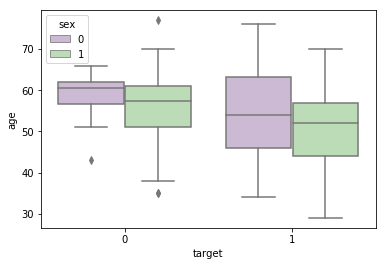

In [11]:
sns.boxplot(x="target", y="age", hue="sex", data=data, palette="PRGn")
plt.show()

#### We can see that women who don't have heart disease have the highest average age.
#### Whats more, people who don't have heart disease appear to have a slightly higher age than those who do.
***

#### Gender
##### 1 = male, 0 = female

In [12]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

#### So roughly 2/3 of the people in this survey are men.
***

#### Cholesterol (chol)

In [13]:
len(data[data['chol'] > 200])

252

In [14]:
252/303 * 100

83.16831683168317

#### Interestingly with high cholesterol being defined as > 200 mg/dl, 83% people in this survey have high cholesterol.
***

### Heart Disease Statistics & Distributions
#### Now lets separate the data according to whether they have heart disease.

In [15]:
heart_disease = data[data['target'] == 1]
no_heart_disease = data[data['target'] == 0]

#### Lets now compare the distributions of each variable for the people who do vs don't have heart disease.

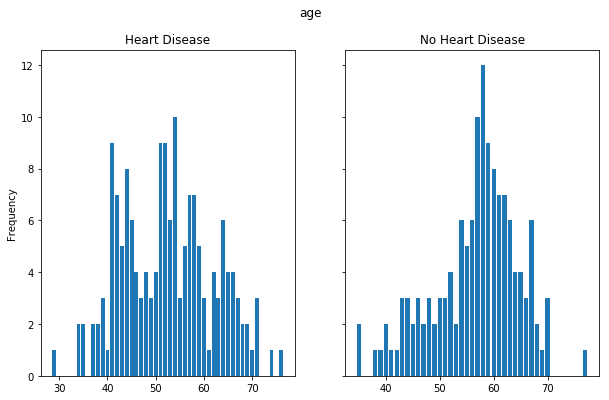

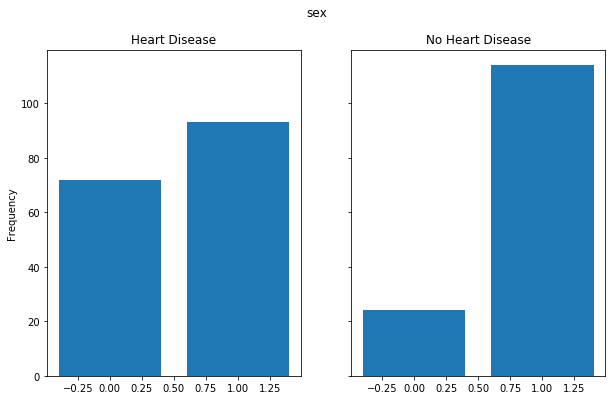

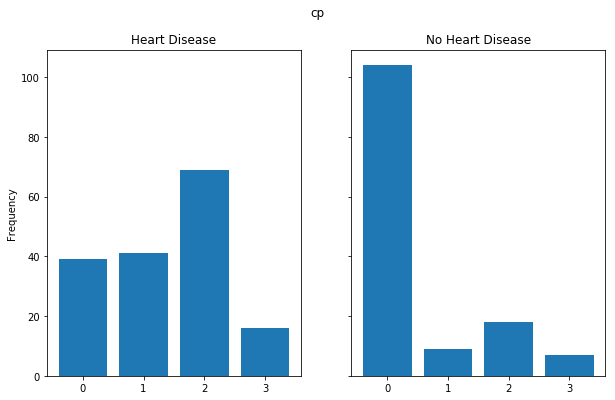

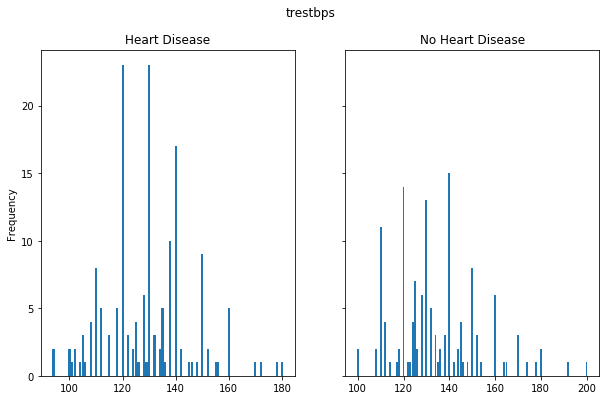

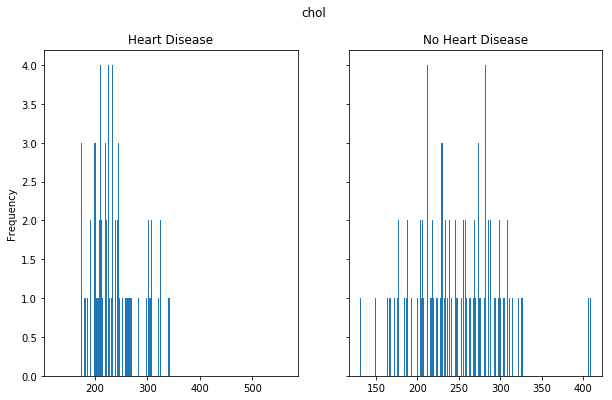

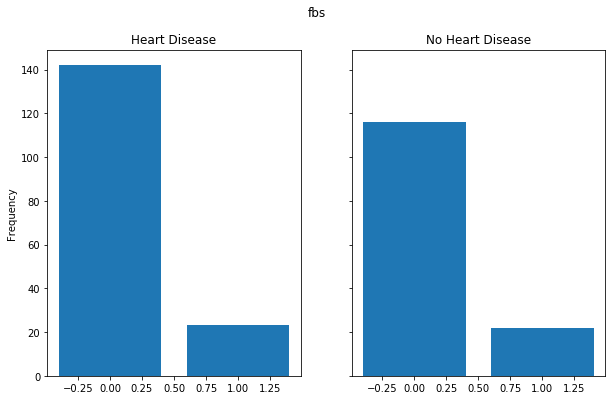

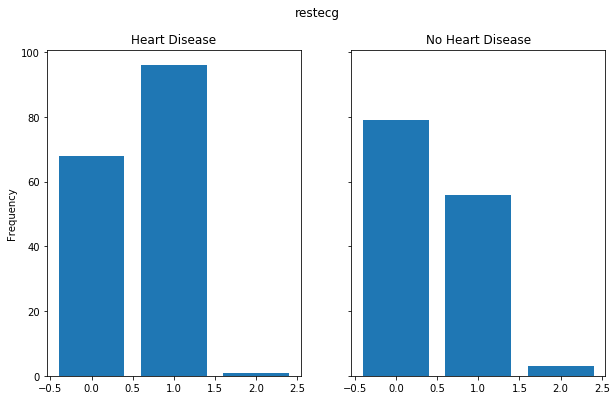

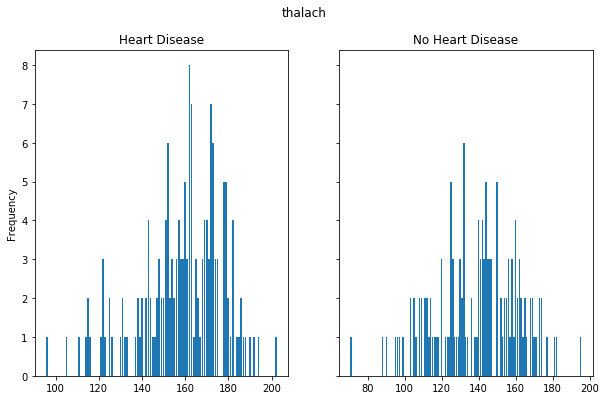

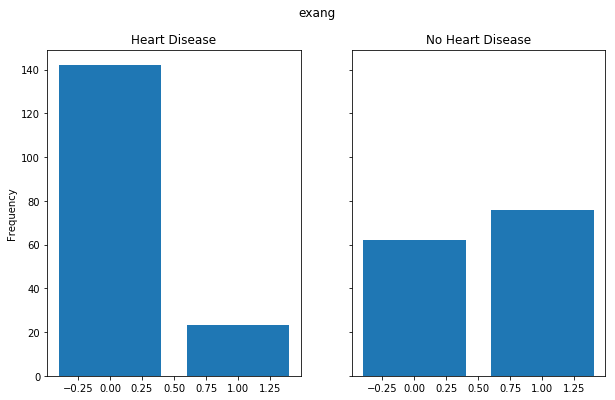

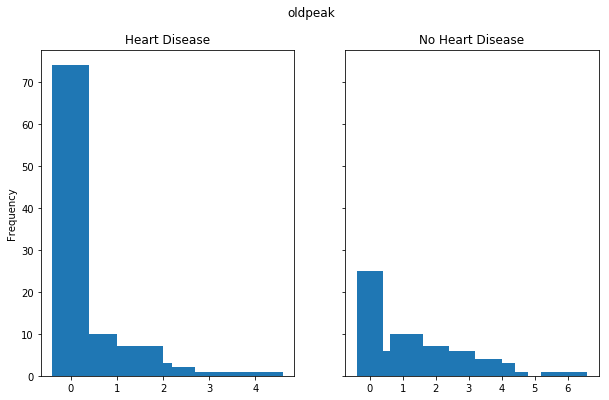

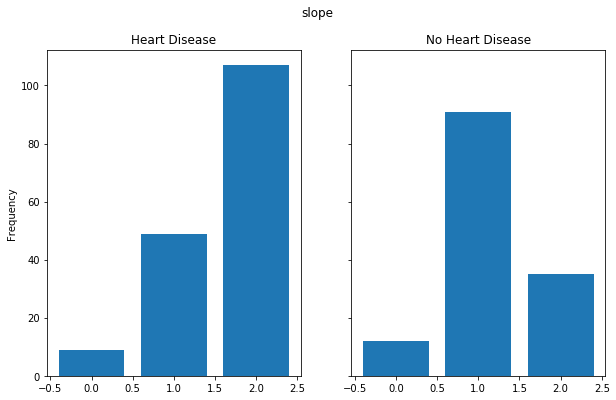

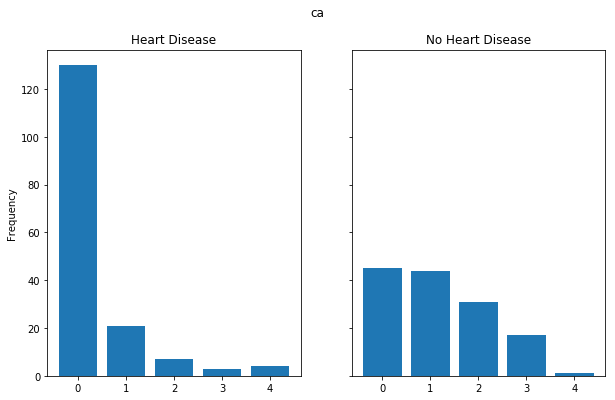

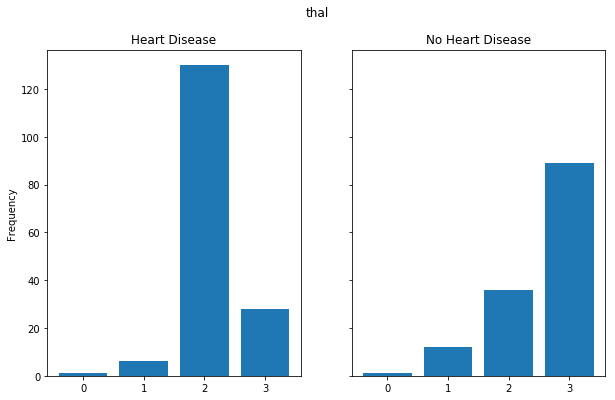

In [16]:
for col in list(heart_disease.columns):
    if(col != 'target'):
        fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,6))

        ax1.set_title('Heart Disease')
        freq = heart_disease[col].value_counts().sort_index()
        ax1.bar(list(freq.index),freq)
        ax1.set_ylabel('Frequency')

        ax2.set_title('No Heart Disease')
        freq = no_heart_disease[col].value_counts().sort_index()
        ax2.bar(list(freq.index),freq)

        fig.suptitle('' + col)
        plt.show()

***
### 2. Data Preprocessing <a id='process'></a>
##### <a href="#toc">Table of Contents</a>

#### Shuffling the rows and resetting the index

In [17]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
1,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
2,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
3,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
4,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1


***
#### Dropping 
* cp (chest pain type) - due to inconsistent/ambiguous encoding (values), listed values 1-4, observed 0-3
* slope (slope of the peak exercise ST segment) - listed values of 1-3, observed 0-2
* thal (defect) - 4 unique values 0-4 when 3 listed with values 3,6,7

In [18]:
data = data.drop(['cp','slope','thal'],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
0,38,1,138,175,0,1,173,0,0.0,4,1
1,43,1,130,315,0,1,162,0,1.9,1,1
2,55,1,132,353,0,1,132,1,1.2,1,0
3,54,1,150,232,0,0,165,0,1.6,0,1
4,57,1,150,126,1,1,173,0,0.2,1,1


***
#### Outlier Detection & Removal
#### In this case there are no outliers to remove, but here is an example of how this could be done anyways.

In [ ]:
from sklearn.covariance import EllipticEnvelope

def removeOutliers(features):
    
    Y = features['STATUS'].values
    feat = features.drop('STATUS',axis=1)
    keys = feat.keys()
    X = feat.values
    
    print("Removing Outliers")
    detector = EllipticEnvelope()
    detector.fit(X)
    predict = detector.predict(X)
    
    feat['In/Out'] = predict
    feat['STATUS'] = Y
    
    inliers = feat[feat['In/Out'] == 1]
    inliers.drop('In/Out', axis=1, inplace=True)
    
    return inliers

***
#### Feature Engineering
##### **[One Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)** of Categorical Variables
* restecg (resting ecg) 

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [20]:
enc = OneHotEncoder()
feature_arr = enc.fit_transform(data[['restecg']]).toarray()
features = pd.DataFrame(feature_arr, columns=['restecg_normal','restecg_abnormal','restecg_probable'])
features.head()

,restecg_normal,restecg_abnormal,restecg_probable
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [21]:
for col in list(features.columns):
    data[col] = features[col]
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,restecg_normal,restecg_abnormal,restecg_probable
0,38,1,138,175,0,1,173,0,0.0,4,1,0.0,1.0,0.0
1,43,1,130,315,0,1,162,0,1.9,1,1,0.0,1.0,0.0
2,55,1,132,353,0,1,132,1,1.2,1,0,0.0,1.0,0.0
3,54,1,150,232,0,0,165,0,1.6,0,1,1.0,0.0,0.0
4,57,1,150,126,1,1,173,0,0.2,1,1,0.0,1.0,0.0


#### Dropping original variable column and one of the new one hot encoded columns to prevent correlation between them

In [22]:
data = data.drop(['restecg','restecg_probable'],axis=1)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_normal,restecg_abnormal
0,38,1,138,175,0,173,0,0.0,4,1,0.0,1.0
1,43,1,130,315,0,162,0,1.9,1,1,0.0,1.0
2,55,1,132,353,0,132,1,1.2,1,0,0.0,1.0
3,54,1,150,232,0,165,0,1.6,0,1,1.0,0.0
4,57,1,150,126,1,173,0,0.2,1,1,0.0,1.0


***
#### Resampling
##### In this case given the largest class only accounts for 54% of the data resampling is not necessary.
##### However here is an example from a different project.

In [ ]:
def resample(train):

    trainX = train.drop(['STATUS'], axis=1)
    keys = trainX.keys()
    trainX = trainX.values
    trainY = np.array(train['STATUS'].values).ravel()

    # Resampling using parameters optimized for recall
    smote = SMOTE(ratio='auto', kind='regular', k_neighbors=20, n_jobs=4)
    enn = EditedNearestNeighbours(ratio='auto', n_neighbors=20, n_jobs=4)
    resampler1 = SMOTEENN(smote=smote, enn=enn)

    resampleX1, resampleY1 = resampler1.fit_sample(trainX, trainY)

    resample1 = pd.DataFrame(data=resampleX1, columns=keys)
    resample1['STATUS'] = resampleY1
    resample1 = resample1.sample(frac=1).reset_index(drop=True)
    
    return resample1

***
#### Scaling the data
##### In this case given the prevalence of categorical variables, scaling won't be done.
##### However here is an example from a different project.

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale(training):
    
    scaler = StandardScaler()
    trainY = np.array(training['target'].values).ravel()
    trainX = training.drop(['target'], axis=1)
    keys = trainX.keys()
    trainX = trainX.values
    
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    
    scaled = pd.DataFrame(data=trainX, columns=keys)
    scaled['target'] = trainY
    
    return scaled


In [34]:
data = scale(data)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.674501,-0.822570,0.876433,0.922303,2.0
1,0.916837,-0.362176,0.478571,0.132510,1.0
2,0.310998,-0.131979,0.649083,0.790671,2.0
3,-1.748856,-0.362176,-1.340227,-1.315444,0.0
4,0.189830,-0.822570,0.762758,0.527406,1.0


***
#### Manually Splitting into Training & Testing
1. Determining the number of rows that correspond to the % to the splits
2. Slicing the training, validation & test sets
3. Splitting sets into x and y

In [23]:
def train_test_split(data,train_split,valid_split,response):
    train_bound = int(len(data) * train_split)
    valid_bound = train_bound + int(len(data) * valid_split)
    
    train = data[:train_bound]
    valid = data[train_bound:valid_bound]
    test = data[valid_bound:]
    print(len(train),len(valid),len(test))

    train_y = train[response]
    train_x = train.drop(response,axis=1)

    valid_y = valid[response]
    valid_x = valid.drop(response,axis=1)
    
    test_y = test[response]
    test_x = test.drop(response,axis=1)
    
    return train_x, train_y, valid_x, valid_y, test_x, test_y


#### Using 60% for training, 20% for validation, 20% for testing

In [24]:
train_x, train_y, valid_x, valid_y, test_x, test_y = train_test_split(data, 0.6, 0.2, 'target')
train_x.head()

181 60 62


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,restecg_normal,restecg_abnormal
0,38,1,138,175,0,173,0,0.0,4,0.0,1.0
1,43,1,130,315,0,162,0,1.9,1,0.0,1.0
2,55,1,132,353,0,132,1,1.2,1,0.0,1.0
3,54,1,150,232,0,165,0,1.6,0,1.0,0.0
4,57,1,150,126,1,173,0,0.2,1,0.0,1.0


***
### 3. Training Models <a id='train'></a>
##### <a href="#toc">Table of Contents</a>

In [25]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def print_stats(actual,predictions):
    print("Percent Accuracy: %.4f" % (accuracy_score(actual,predictions)*100))
    print("Percent Precision: %.4f" % (precision_score(actual,predictions)*100))
    print("Percent Recall: %.4f" % (recall_score(actual,predictions)*100))
    print("ROC score: %.4f" % roc_auc_score(actual,predictions))
    print("F1 score: %.4f" % f1_score(actual,predictions))

In [26]:
models = ['Random Forest','Decision Tree','Logistic Regression','XGBoost','Naive Bayes','SVM','K Neighbors','Gradient Boosting']
accuracy, precision, recall, roc, f1 = [], [], [], [], []

***
### Random Forest
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Random_forest)**

In [27]:
from sklearn.ensemble import RandomForestClassifier

Percent Accuracy: 79.0323
Percent Precision: 82.3529
Percent Recall: 80.0000
ROC score: 0.7889
F1 score: 0.8116


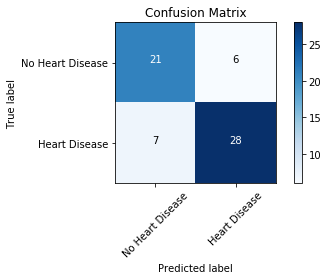

In [28]:
RF = RandomForestClassifier(random_state=10)
RF.fit(train_x,train_y)
preds = RF.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

#####  F1 score is the harmonic average of the precision and recall

#### Total number for each class (0 = no heart disease, 1 = heart disease)

In [29]:
test_y.value_counts()

1    35
0    27
Name: target, dtype: int64

#### Examining the relative importance of each variable for the given model.

In [31]:
cols = list(train_x.columns)
feats = pd.DataFrame(data=RF.feature_importances_,index=cols,columns=['Importance']).sort_values('Importance',ascending=False)
feats

,Importance
exang,0.169978
ca,0.151586
thalach,0.142339
age,0.139777
oldpeak,0.116163
trestbps,0.110765
chol,0.079195
sex,0.032918
restecg_abnormal,0.027585
restecg_normal,0.022768


***
### Decision Tree
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/tree.html)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Decision_tree)**

In [32]:
from sklearn.tree import DecisionTreeClassifier

Percent Accuracy: 69.3548
Percent Precision: 71.0526
Percent Recall: 77.1429
ROC score: 0.6820
F1 score: 0.7397


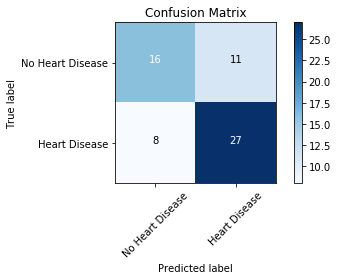

In [33]:
dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)
preds = dt.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

#### Examining the relative importance of each variable for the given model.

In [34]:
cols = list(train_x.columns)
feats = pd.DataFrame(data=dt.feature_importances_,index=cols,columns=['Importance']).sort_values('Importance',ascending=False)
feats

,Importance
exang,0.262093
chol,0.192380
age,0.138209
ca,0.130298
trestbps,0.084810
oldpeak,0.083484
sex,0.057871
thalach,0.035787
restecg_abnormal,0.011301
restecg_normal,0.003767


***
### Logistic Regression
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)**

In [35]:
from sklearn.linear_model import LogisticRegression

Percent Accuracy: 85.4839
Percent Precision: 84.2105
Percent Recall: 91.4286
ROC score: 0.8460
F1 score: 0.8767


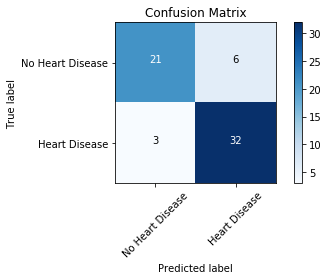

In [36]:
LR = LogisticRegression()
LR.fit(train_x,train_y)
preds = LR.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

#### Printing Coefficients

In [38]:
cols = list(train_x.columns)
for i in range(len(cols)):
    print(cols[i] + '\t%.4f' % LR.coef_[0][i])

age	-0.0011
sex	-1.1561
trestbps	-0.0099
chol	-0.0038
fbs	0.4637
thalach	0.0267
exang	-1.5873
oldpeak	-0.4459
ca	-0.6639
restecg_normal	0.0552
restecg_abnormal	0.5836


***
### XGBoost
##### **[Documentation](https://xgboost.readthedocs.io/en/latest/)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Xgboost)**

In [39]:
from xgboost import XGBClassifier
from xgboost import plot_importance

Percent Accuracy: 82.2581
Percent Precision: 81.5789
Percent Recall: 88.5714
ROC score: 0.8132
F1 score: 0.8493


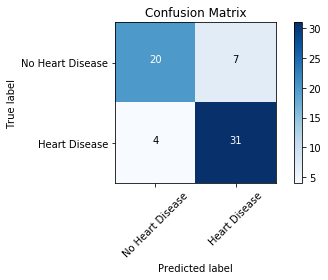

In [40]:
XG = XGBClassifier()
XG.fit(train_x,train_y)
preds = XG.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

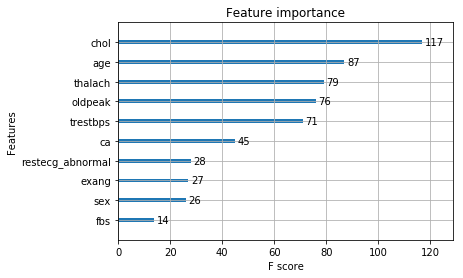

In [41]:
plot_importance(XG)

***
### Gaussian Naive Bayes
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)**

In [42]:
from sklearn.naive_bayes import GaussianNB

Percent Accuracy: 85.4839
Percent Precision: 86.1111
Percent Recall: 88.5714
ROC score: 0.8503
F1 score: 0.8732


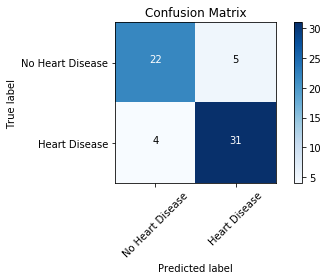

In [43]:
GNB = GaussianNB()
GNB.fit(train_x,train_y)
preds = GNB.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

***
### Support Vector Machine
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)**

In [44]:
from sklearn.svm import SVC

Percent Accuracy: 82.2581
Percent Precision: 83.3333
Percent Recall: 85.7143
ROC score: 0.8175
F1 score: 0.8451


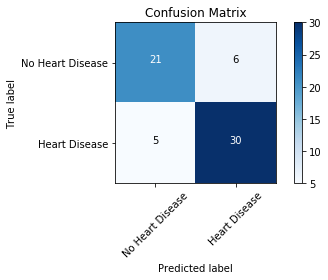

In [45]:
SVM = SVC(kernel='linear')
SVM.fit(train_x,train_y)
preds = SVM.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

***
### K Neighbors
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)**

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Percent Accuracy: 74.1935
Percent Precision: 73.1707
Percent Recall: 85.7143
ROC score: 0.7249
F1 score: 0.7895


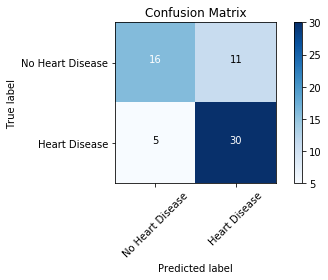

In [47]:
KN = KNeighborsClassifier(n_neighbors=5)
KN.fit(train_x,train_y)
preds = KN.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

***
### Gradient Boosting
##### **[SKLearn Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)**&nbsp;&nbsp;&nbsp;&nbsp;**[Wikipedia](https://en.wikipedia.org/wiki/Gradient_boosting)**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

Percent Accuracy: 77.4194
Percent Precision: 75.6098
Percent Recall: 88.5714
ROC score: 0.7577
F1 score: 0.8158


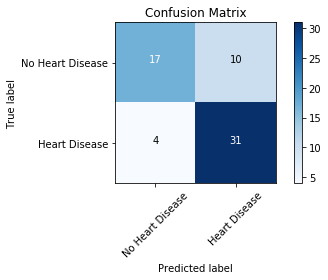

In [49]:
GBoost = GradientBoostingClassifier()
GBoost.fit(train_x,train_y)
preds = GBoost.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

accuracy.append(accuracy_score(test_y,preds))
precision.append(precision_score(test_y,preds))
recall.append(recall_score(test_y,preds))
roc.append(roc_auc_score(test_y,preds))
f1.append(f1_score(test_y,preds))

print_stats(test_y,preds)

***
#### Default Model Comparison

In [50]:
compare = pd.DataFrame(data={'accuracy':accuracy, 'precision':precision, 'recall':recall, 'roc':roc, 'f1':f1},index=models)
compare

,accuracy,precision,recall,roc,f1
Random Forest,0.790323,0.823529,0.800000,0.788889,0.811594
Decision Tree,0.693548,0.710526,0.771429,0.682011,0.739726
Logistic Regression,0.854839,0.842105,0.914286,0.846032,0.876712
XGBoost,0.822581,0.815789,0.885714,0.813228,0.849315
Naive Bayes,0.854839,0.861111,0.885714,0.850265,0.873239
SVM,0.822581,0.833333,0.857143,0.817460,0.845070
K Neighbors,0.741935,0.731707,0.857143,0.724868,0.789474
Gradient Boosting,0.774194,0.756098,0.885714,0.757672,0.815789


In [51]:
print('\tAccuracy\n')
print(compare['accuracy'].sort_values(ascending=False))

	Accuracy

Naive Bayes            0.854839
Logistic Regression    0.854839
SVM                    0.822581
XGBoost                0.822581
Random Forest          0.790323
Gradient Boosting      0.774194
K Neighbors            0.741935
Decision Tree          0.693548
Name: accuracy, dtype: float64


In [54]:
print('Receiver Operating Characteristic\n')
print(compare['roc'].sort_values(ascending=False))

Receiver Operating Characteristic

Naive Bayes            0.850265
Logistic Regression    0.846032
SVM                    0.817460
XGBoost                0.813228
Random Forest          0.788889
Gradient Boosting      0.757672
K Neighbors            0.724868
Decision Tree          0.682011
Name: roc, dtype: float64


***
### Conclusion
#### Of the 8 models tested with default parameters, the Naive Bayes and Logistic Regression perform the best with a ~85% accuracy, misclassifying 9 out of the 62 test cases.

***
### 4. Model Optimzation <a id='optimize'></a>
##### <a href="#toc">Table of Contents</a>

#### Optimizing a random forest model using the ROC AUC score on the validation set with **[parfit](https://github.com/jmcarpenter2/parfit)**

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.3s finished


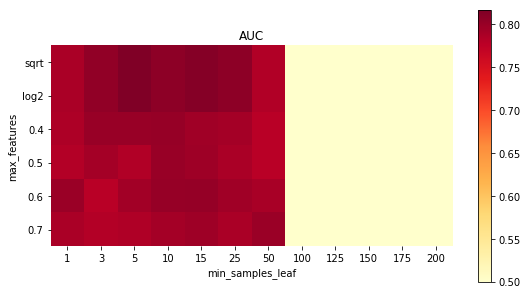

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Best ROC score: 0.8167


In [55]:
import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid

paramGrid = ParameterGrid({
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [42]
})

best_model, best_score, all_models, all_scores = pf.bestFit(RandomForestClassifier, paramGrid, 
     train_x, train_y, valid_x, valid_y, 
     metric=roc_auc_score, greater_is_better=True, scoreLabel='AUC')

print(best_model)
print("\nBest ROC score: %.4f" % best_score)

***
#### Checking the performance of best parameters on the test set

Percent Accuracy: 83.8710
Percent Precision: 82.0513
Percent Recall: 91.4286
ROC score: 0.8275
F1 score: 0.8649


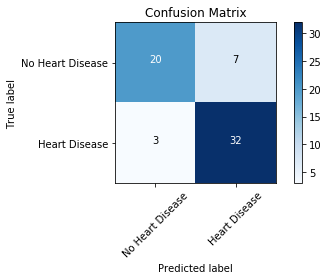

In [61]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

RF.fit(train_x,train_y)
preds = RF.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

print_stats(test_y,preds)

#### Using the optimal parameters produces significantly better performance, by 3 misclassification.
#### Likely would be more significant using a larger dataset but nevertheless demonstrates the concept using this toy data.

***
#### Trying an ensemble of the best models using SKLearn's **[Voting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)**

In [57]:
from sklearn.ensemble import VotingClassifier

Percent Accuracy: 87.0968
Percent Precision: 84.6154
Percent Recall: 94.2857
ROC score: 0.8603
F1 score: 0.8919


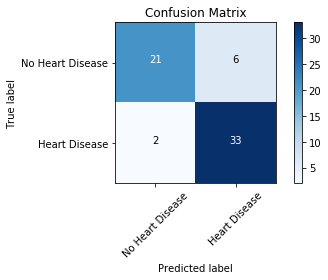

In [62]:
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='sqrt', max_leaf_nodes=None,min_impurity_decrease=0.0, min_impurity_split=None,min_samples_leaf=5, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=-1,oob_score=False, random_state=42, verbose=0, warm_start=False)),
    ('nb',GaussianNB()),
    ('lr', LogisticRegression())    
    ], voting='hard')

ensemble = ensemble.fit(train_x, train_y)
preds = ensemble.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

print_stats(test_y,preds)

#### In this case the ensemble of models performs better than each individual model.

***
#### **Conclusion:**
#### Although the best model in this case turned out to be the single optimized random forest model, one can achieve comparable results using several medicore models. 

***
#### Saving Model

In [64]:
from sklearn.externals import joblib

In [65]:
joblib.dump(ensemble, 'VC.pkl') 

['VC.pkl']

#### Loading Model

Percent Accuracy: 87.0968
Percent Precision: 84.6154
Percent Recall: 94.2857
ROC score: 0.8603
F1 score: 0.8919


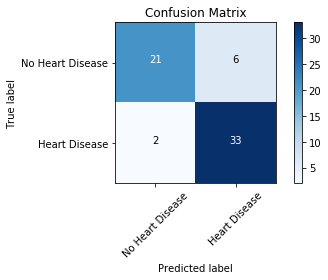

In [66]:
VC = joblib.load('VC.pkl')
preds = VC.predict(test_x)

cnf_matrix = confusion_matrix(test_y,preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

print_stats(test_y,preds)

***
#### SKLearn **[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)**
#### Although I showed how to perform each step in a machine learning pipeline here is an example of how this can be done using SKLearn

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
                    ])

pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)

***
### 5. **[K Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)** <a id='cluster'></a>
##### <a href="#toc">Table of Contents</a>

In [67]:
from sklearn.cluster import KMeans

In [68]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,restecg_normal,restecg_abnormal
0,38,1,138,175,0,173,0,0.0,4,1,0.0,1.0
1,43,1,130,315,0,162,0,1.9,1,1,0.0,1.0
2,55,1,132,353,0,132,1,1.2,1,0,0.0,1.0
3,54,1,150,232,0,165,0,1.6,0,1,1.0,0.0
4,57,1,150,126,1,173,0,0.2,1,1,0.0,1.0


In [69]:
temp = data.drop('target',axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(temp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [70]:
kmeans.cluster_centers_

array([[5.31e+01, 7.41e-01, 1.30e+02, 2.16e+02, 1.55e-01, 1.52e+02,
        2.85e-01, 9.74e-01, 6.68e-01, 4.35e-01, 5.54e-01],
       [5.67e+01, 5.82e-01, 1.35e+02, 2.99e+02, 1.36e-01, 1.46e+02,
        4.00e-01, 1.16e+00, 8.36e-01, 5.73e-01, 4.09e-01]])

In [71]:
kmeans.labels_[:5]

array([0, 1, 1, 0, 0])

Percent Accuracy: 42.2442
Percent Precision: 45.4545
Percent Recall: 30.3030
ROC score: 0.4341
F1 score: 0.3636


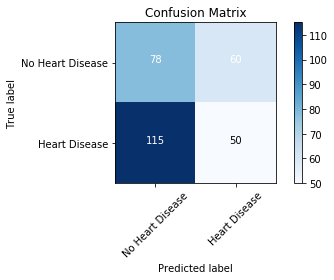

In [72]:
preds = list(kmeans.labels_)
cnf_matrix = confusion_matrix(data['target'],preds)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease','Heart Disease'],title='Confusion Matrix')

print_stats(data['target'],preds)

#### So KMeans doesn't do a very good job of grouping the data according to heart disease.
***